In [1]:
import numpy as np
from keras.preprocessing import image
from keras.models import model_from_json
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
from boxing import draw_boxes
import pandas as pd
from PIL import Image

Using CNTK backend


In [ ]:
# Define metric and loss


In [ ]:
# Loading model
json_file = open("Models/BBModel.json", "r")
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("Models/BBModel.h5")
model.compile('adam', dice_loss, [dice_coef])

In [2]:
full_labels = pd.read_csv('DATA/stored/raccoon_labels.csv')
full_labels.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,raccoon-1.jpg,650,417,raccoon,81,88,522,408
1,raccoon-10.jpg,450,495,raccoon,130,2,446,488
2,raccoon-100.jpg,960,576,raccoon,548,10,954,520
3,raccoon-101.jpg,640,426,raccoon,86,53,400,356
4,raccoon-102.jpg,259,194,raccoon,1,1,118,152


In [3]:
def draw_boxes(img, boxes):
    import cv2
    
    for box in boxes:
        img = cv2.rectangle(img, (box['xmin'], box['ymin']), (box['xmax'], box['ymax']), (0, 255, 0), 2)
        cv2.putText(img, 
                    box['class']+' '+box['prob'] if 'brob' in box else box['class'], 
                    (box['xmin'], box['ymin'] - 6), 
                    cv2.FONT_ITALIC, 
                    1.2e-3 * img.shape[0], 
                    (0,255,0),
                    2,
                    cv2.LINE_AA)
    return img.astype('uint8')

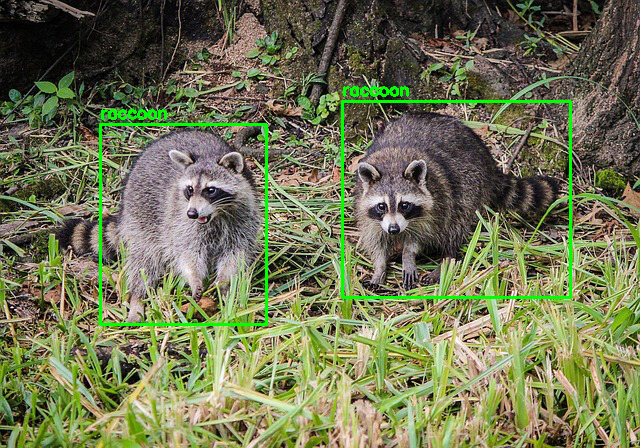

In [4]:
img = image.img_to_array(Image.open('DATA/images/raccoon-117.jpg'))
boxes = full_labels[full_labels.filename == 'raccoon-117.jpg'].to_dict('records')
img = draw_boxes(img, boxes)
Image.fromarray(img)

In [ ]:
img = image.load_img('')

plt.figure(figsize=(8,8))
plt.subplot(221)
plt.title('SOURCE')
plt.imshow(img)
plt.show()